# Simulations for the Gap statistic
---
We're going to start by defining a function which, given a matrix $X$ containing the points we are interested in clustering, gives a sample from the reference distribution associated to $X$.

In [122]:
reference_sample = function(points_matrix, sample_size, method = "svd") {
    if(method == "svd") {
        return(reference_SVD_sample(points_matrix, sample_size))
    } else if(method == "simple") {
        return(reference_simple_sample(points_matrix, sample_size))
    } else {
        stop("Not valid method for reference sampling!")
    }
}

reference_simple_sample = function(points_matrix, sample_size) {
    mins = c()
    maxs = c()
    for (column in 1 : ncol(points_matrix)) {
        mins = c(mins, min(points_matrix[, column]))
        maxs = c(maxs, max(points_matrix[, column]))
    }
    samples = c()
    for (column in 1 : ncol(points_matrix)) {
        samples = c(samples, runif(sample_size, min = mins[column], max = maxs[column]))
    }
    return(matrix(samples, ncol = ncol(points_matrix), byrow = FALSE))
}

reference_SVD_sample = function(points_matrix, sample_size) {
    means = c()
    for (column in 1 : ncol(points_matrix)) {
        means = c(means, mean(points_matrix[, column]))
    }
    centered_matrix = points_matrix - means
    V = svd(centered_matrix)$v
    sample = reference_simple_sample(centered_matrix %*% V, sample_size)
    sample = sample %*% t(V)
    return(sample + means)
}

We now define a function which, given a set of points, computes the gap statistic for that set under the kmean clustering algorithm.

In [179]:
compute_gap_statistic = function(data, k, B, method = "svd", with_se = FALSE) {
    standard_data = scale(data)
    clustering = kmeans(data, k)
    log_WK = log(clustering$tot.withinss)
    rows = nrow(data)
    reference_sample_data = reference_sample(data, B * rows, method)
    log_WKStar = c()
    for (instance in 1 : B) {
        first = 1 + rows * (instance - 1)
        last = rows * instance
        clustering = kmeans(reference_sample_data[first : last, ], k)
        log_WKStar = c(log_WKStar, log(clustering$tot.withinss))
    }
    if(with_se) {
        se = sd(log_WKStar) * sqrt(1 + (1 / B))
        return(c(mean(log_WKStar) - log_WK, se))
    }
    return(mean(log_WKStar) - log_WK)
}

In [186]:
find_best_k = function(data, B, method = "svd") {
    gap = -1
    k = 0
    gap_k_plus = compute_gap_statistic(data, k + 1, B, method)
    while(gap < 0) {
        k = k + 1
        gap_k = gap_k_plus
        k_plus = compute_gap_statistic(data, k + 1, B, method, TRUE)
        gap_k_plus = k_plus[1]
        se_k_plus = k_plus[2]
        gap = gap_k - gap_k_plus + se_k_plus
    }
    return(k)
}

In [307]:
A = c()
for (column in 1 : 2) {
    A = c(A, rnorm(43, -1 + 2 * (column - 1), 0.1), rnorm(21, 2, 0.1), rnorm(22, 7 - (column ** 2), 0.1), rnorm(92, -3 * column, 1))
}
A = matrix(A, ncol = 2, byrow = FALSE)

In [314]:
find_best_k(A, 1000, method = "svd")

[1] 3

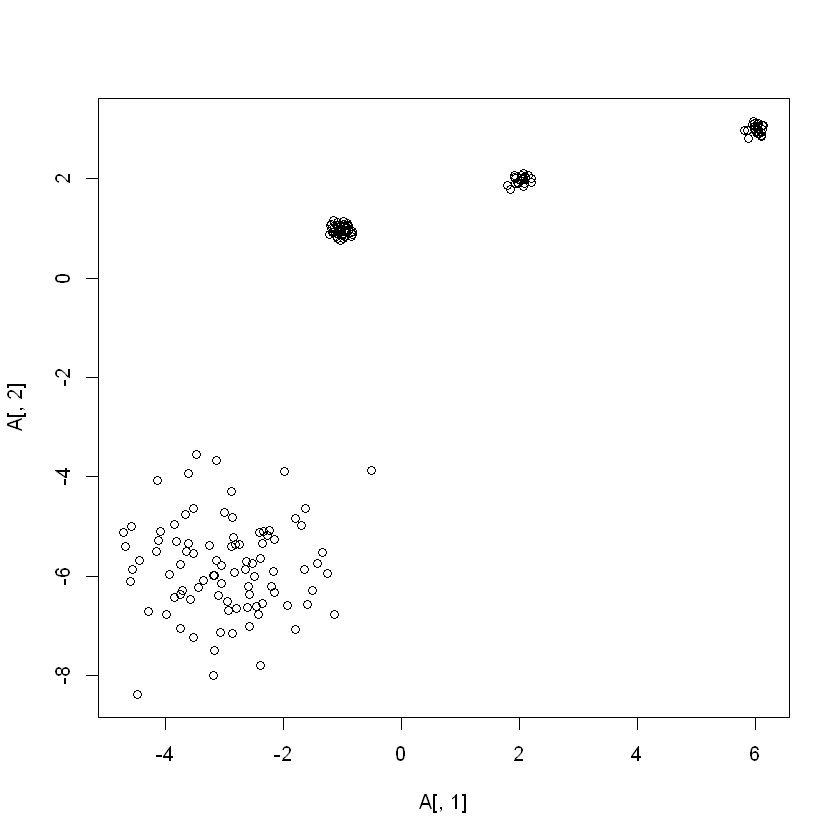

In [313]:
plot(A[, 1], A[, 2])

In [274]:
A[1, ]

[1] 1.0010351 0.9991793

In [284]:
A

3.000524,5.000600
3.000045,4.999279
2.998701,5.000435
2.999484,5.001990
3.000636,5.000513
2.998938,4.999677
3.000663,4.997633
2.999869,5.000054
2.999299,5.000449
3.001282,5.000792
3.000111,5.000070
